In [ ]:
# !{sys.executable} -m pip install efficientnet-pytorch

In [48]:
from pathlib import Path
from fastai.basic_train import load_learner
from fastai.train import ClassificationInterpretation
from config.structure import get_data_sources
from training.data import load_data

In [ ]:
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

%reload_ext autoreload
%autoreload 1
%matplotlib inline

import os
os.chdir('../')

In [21]:
data, labels = load_data(dataset_info=get_data_sources()['stanford'], batch_size=32)
labels.head()

2020-05-07 19:50:43,228: training.data: Loading data from: data\input\stanford\cars_train; image size: 300; batch size: 32.
2020-05-07 19:50:46,367: training.data: Data loaded.


,filename,bbox_x1,bbox_y1,bbox_x2,bbox_y2,class_id,class_name,is_test,filename_cropped,bbox_h,bbox_w
0,00001.jpg,39,116,569,375,14,Audi TTS Coupe 2012,0,cropped_00001.jpg,260,531
1,00002.jpg,36,116,868,587,3,Acura TL Sedan 2012,0,cropped_00002.jpg,472,833
2,00003.jpg,85,109,601,381,91,Dodge Dakota Club Cab 2007,0,cropped_00003.jpg,273,517
3,00004.jpg,621,393,1484,1096,134,Hyundai Sonata Hybrid Sedan 2012,0,cropped_00004.jpg,704,864
4,00005.jpg,14,36,133,99,106,Ford F-450 Super Duty Crew Cab 2012,0,cropped_00005.jpg,64,120


In [55]:
from fastai.basic_train import Learner
from fastai.callbacks import CSVLogger, SaveModelCallback
from fastai.metrics import accuracy, LabelSmoothingCrossEntropy

from model.efficient_net import EfficientNet
from structure.efficient_nets import EfficientNets
from structure.trial_info import TrialInfo

model_info = EfficientNets.b0
load_weights = True
advprop = False

model = EfficientNet(model_info.value, load_weights, advprop)

trial_info = TrialInfo(model_info, load_weights, advprop)
trial_info.output_folder = 'data/output/trials/2020_05_05/2d3768cc-8eeb-11ea-878b-0242ac1c0002'
learn = Learner(data=data,
                model=model,
                wd=1e-3,
                bn_wd=False,
                true_wd=True,
                metrics=[accuracy],
                loss_func=LabelSmoothingCrossEntropy(),
                callback_fns=[CSVLogger, SaveModelCallback],
                path=trial_info.output_folder
                ).to_fp16()
learn = learn.load('bestmodel')

AttributeError: 'Learner' object has no attribute 'losses'

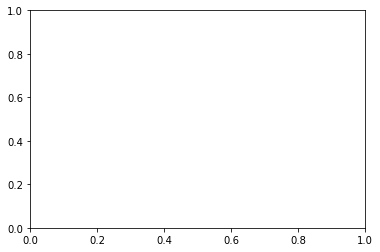

In [58]:
learn.recorder.plot_losses()

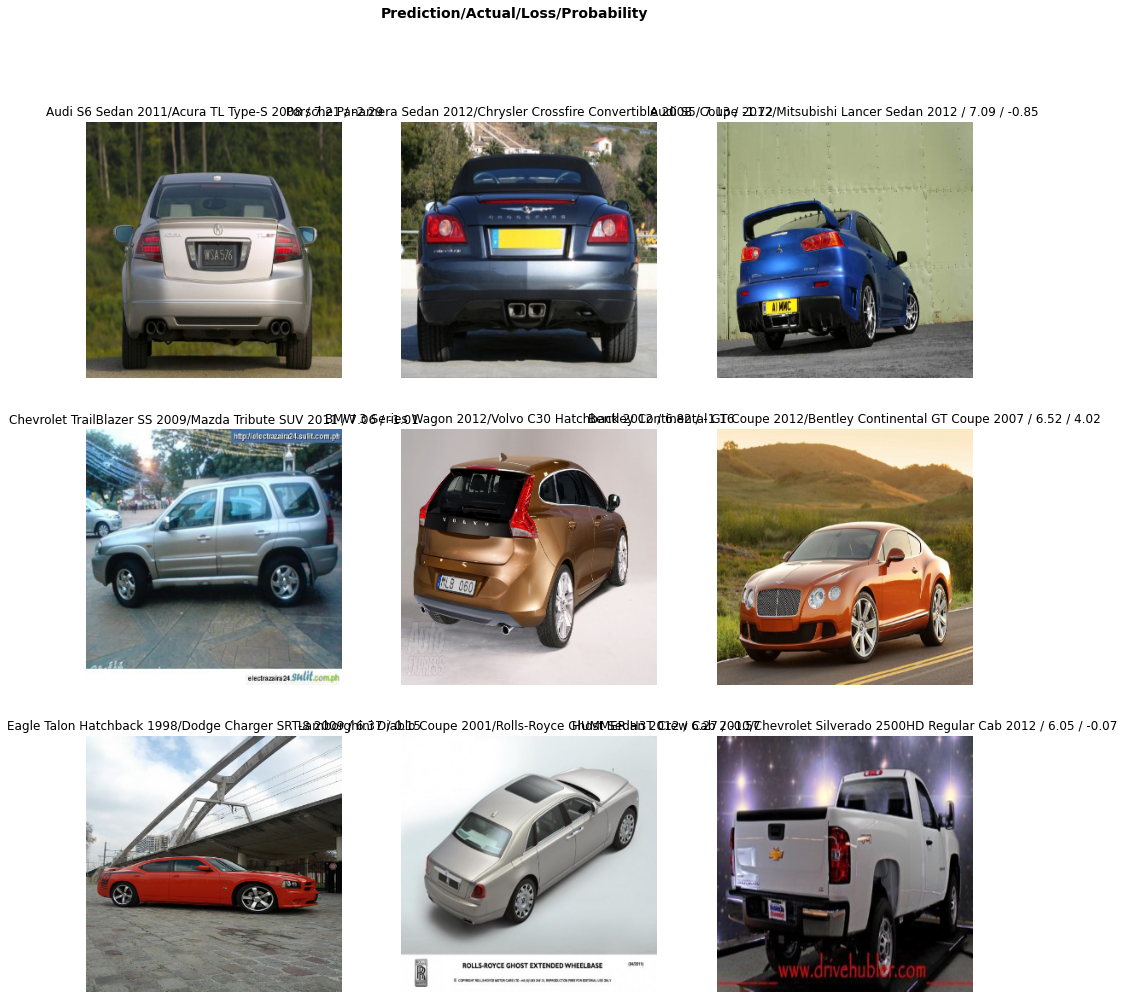

In [56]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(16,16))


In [ ]:
labels = pd.read_csv(dataset_info['labels']['location'])